In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pyplot

In [2]:
df=pd.read_csv("3. Police Data.csv")
df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [3]:
df.head(5)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(65535, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [6]:
df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [9]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [10]:
df[df.duplicated()]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
16,7/19/2005,0:30,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
104,10/3/2005,13:26,NaN,M,1975.0,30.0,Black,Speeding,Speeding,False,NaN,Arrest Driver,True,30+ Min,False
117,10/4/2005,0:36,NaN,M,1961.0,44.0,White,Special Detail/Directed Patrol,Other,False,NaN,Arrest Driver,True,30+ Min,False
149,10/5/2005,10:00,NaN,M,1981.0,24.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
239,10/8/2005,12:30,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64677,10/27/2012,9:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
64886,11/9/2012,1:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65055,11/18/2012,0:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65073,11/18/2012,18:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df[df.duplicated()]

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop


<AxesSubplot:>

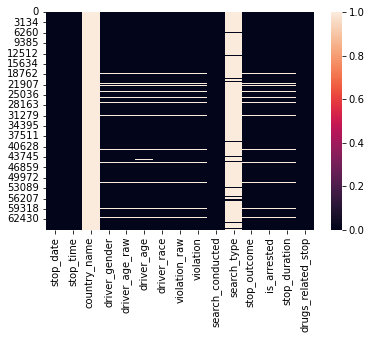

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61298.000000,61045.000000
mean,NaN,1967.768932,34.155525
std,NaN,121.228412,12.763762
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [15]:
df.corr()

,country_name,driver_age_raw,driver_age,search_conducted,drugs_related_stop
country_name,NaN,NaN,NaN,NaN,NaN
driver_age_raw,NaN,1.000000,-0.985193,0.016089,0.010154
driver_age,NaN,-0.985193,1.000000,-0.057647,-0.044347
search_conducted,NaN,0.016089,-0.057647,1.000000,0.450548
drugs_related_stop,NaN,0.010154,-0.044347,0.450548,1.000000


In [16]:
df.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [17]:
df.shape

(65214, 15)

In [19]:
df.drop( columns ='country_name',inplace=True)

In [20]:
df.drop( columns ='search_type',inplace=True)

In [21]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [22]:
df.isnull().sum()

stop_date                0
stop_time                0
driver_gender         3923
driver_age_raw        3916
driver_age            4169
driver_race           3922
violation_raw         3922
violation             3922
search_conducted         0
stop_outcome          3922
is_arrested           3922
stop_duration         3922
drugs_related_stop       0
dtype: int64

In [23]:
df[df.violation_raw =='Speeding'].driver_gender.value_counts()

M    25441
F    11661
Name: driver_gender, dtype: int64

In [25]:
df.groupby('driver_gender').search_conducted.sum()

driver_gender
F     365
M    2105
Name: search_conducted, dtype: int64

In [26]:
df.search_conducted.value_counts()

False    62744
True      2470
Name: search_conducted, dtype: int64

In [27]:
df.stop_duration.value_counts()

0-15 Min     47264
16-30 Min    11403
30+ Min       2624
2                1
Name: stop_duration, dtype: int64

In [28]:
df['stop_duration'] = df['stop_duration'].map( {'0-15 Min':7.5, '16-30 Min':24 , '30+ Min':45})

In [30]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,7.5,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,7.5,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,7.5,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False


In [31]:
df['stop_duration'].mean()

12.175229642198692

In [33]:
df.groupby('violation_raw').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation_raw,,,,,,,,
APB,50.0,35.360000,11.547170,18.0,26.00,34.0,42.75,72.0
Call for Service,776.0,33.765464,13.164631,16.0,23.00,30.0,42.00,86.0
Equipment/Inspection Violation,6489.0,31.682540,11.383680,16.0,23.00,28.0,39.00,81.0
Motorist Assist/Courtesy,126.0,35.515873,12.460327,17.0,25.00,32.0,46.00,63.0
Other Traffic Violation,11844.0,36.742232,13.258955,15.0,25.00,35.0,47.00,86.0
Registration Violation,2222.0,32.652115,11.151732,16.0,24.00,30.0,40.00,74.0
Seatbelt Violation,3.0,30.333333,10.214369,23.0,24.50,26.0,34.00,42.0
Special Detail/Directed Patrol,2295.0,43.552070,11.435836,17.0,35.00,44.0,52.00,78.0
Speeding,37019.0,33.269105,12.618831,15.0,23.00,30.0,42.00,88.0
